In [12]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [14]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [15]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [16]:
len(df_0)

7500

In [17]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [19]:
#Changing df_0 into cleaned_df_0
df_0 = df_0[(df_0['epsilon'] != .152642) & (df_0['n_zero_square'] != 596.36)]
len(df_0)


5000

In [20]:

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0[(df_0['any_less_than_5'] == False)]
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
1339,4283,0.237142,944.933951,32,60.606667,"[255.13100000000003, 353.019, 495.122, 599.699...","[255.13, 97.89, 142.1, 104.58, 39.65, 56.04, 7...",1113063,886937,62.109375,False
1344,4296,0.237142,944.933951,41,47.619286,"[6.356, 31.794000000000004, 53.299, 84.319, 14...","[6.36, 25.44, 21.5, 31.02, 59.8, 25.83, 13.07,...",710034,1289966,47.782683,False
1345,4298,0.237142,944.933951,22,86.956522,"[11.753, 53.936, 266.573, 448.84700000000004, ...","[11.75, 42.18, 212.64, 182.27, 124.11, 145.46,...",1008827,991173,87.875455,False
2510,2700,0.237142,944.933951,23,83.332917,"[157.692, 321.755, 351.306, 361.515, 492.272, ...","[157.69, 164.06, 29.55, 10.21, 130.76, 22.16, ...",998447,1001553,85.507826,False
2516,2506,0.237142,944.933951,27,71.428571,"[11.415, 212.86700000000002, 223.971, 241.323,...","[11.41, 201.45, 11.1, 17.35, 76.52, 41.02, 8.8...",763346,1236654,70.545926,False


In [21]:
len(df_0_cleaned)

2234

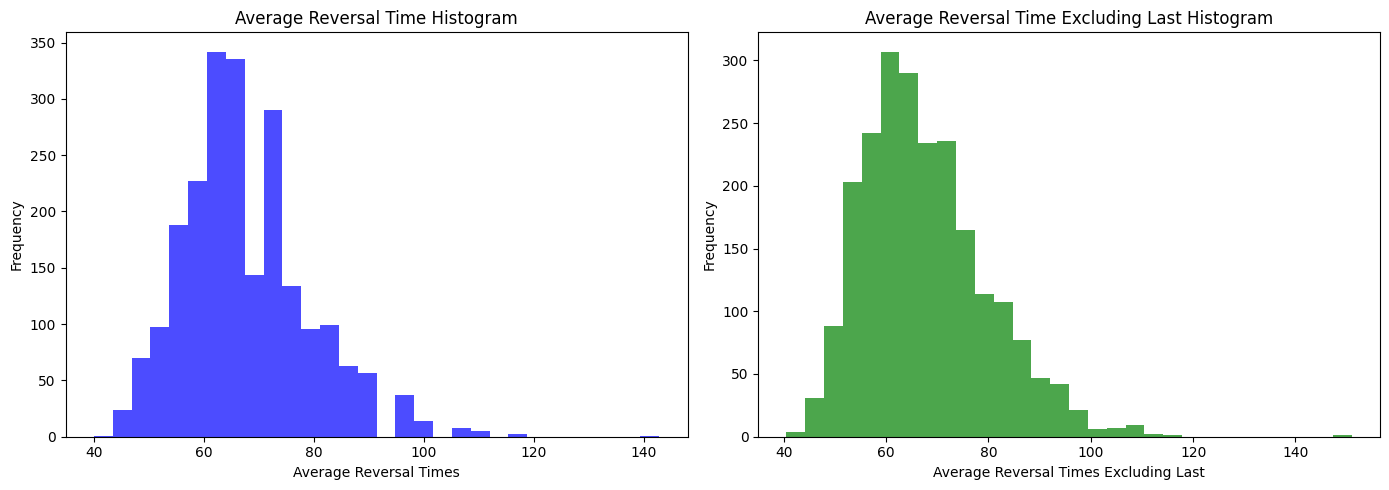

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_0_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_0_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

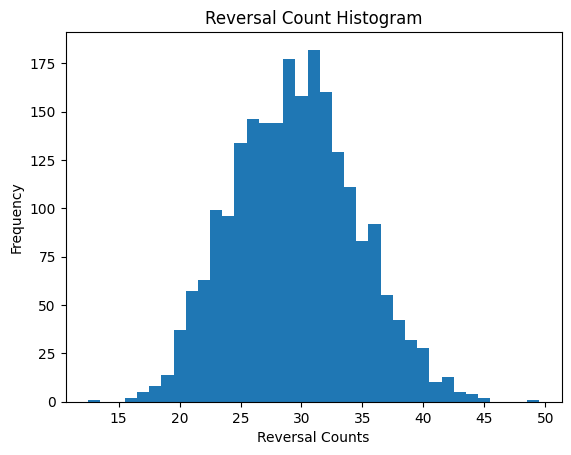

In [23]:
bin_edges = np.arange(start=df_0_cleaned['reversal_count'].min() - .5,
                      stop= df_0_cleaned['reversal_count'].max() + 1.5)
df_0_cleaned['reversal_count'].plot(kind = 'hist', bins = bin_edges, align = 'mid')
plt.title('Reversal Count Histogram')
plt.xlabel('Reversal Counts')
plt.show()